In [86]:
import pandas as pd 

In [87]:
df = pd.read_csv('Dados/ObesityDataSet_raw_and_data_sinthetic.csv')

O dataset escolhido busca investigar o quanto certos habitos e caracteristicas influenciam no IMC das pessoas. Escolhi o dataset por possuir muitas variaveis categoricas, o que é interessante para o treinamento do modelo, e também por ser um tópico de relevância para a saúde humana.

Ele está disponível no Kaggle: https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset

In [88]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [89]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [90]:
df.info()  # Nao existem valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Dados nao categoricos: idade, altura e peso.

In [91]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [92]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import OneHotEncoder

col_categoricas = df.select_dtypes(include=['object']).columns
col_categoricas = col_categoricas.drop('NObeyesdad')

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = one_hot_encoder.fit_transform(df[col_categoricas])

encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(col_categoricas))

df_numerico = df.drop(columns=col_categoricas)  
df = pd.concat([df_numerico.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [94]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [95]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [96]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

aux = df.drop(['NObeyesdad', 'Weight', 'Age', 'Height'], axis=1)

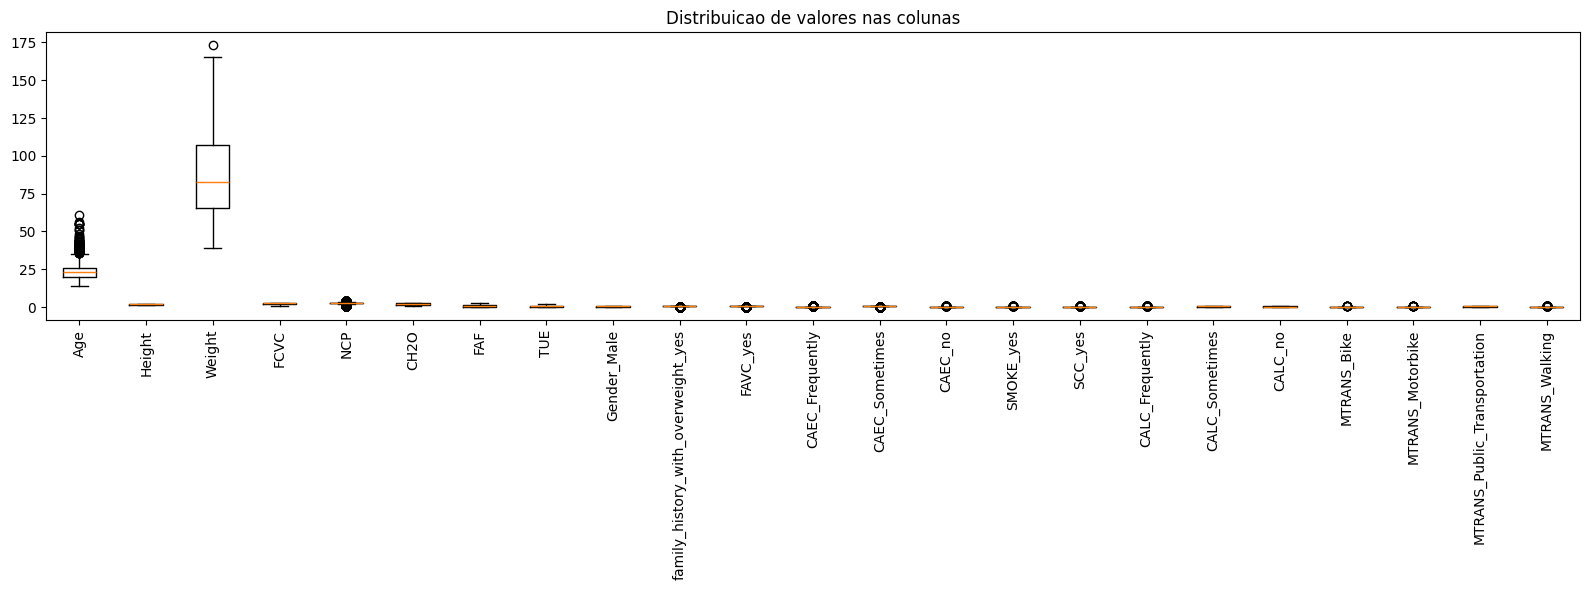

In [97]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 6))
plt.boxplot(X.values, tick_labels=X.columns, vert=True)
plt.xticks(rotation=90)
plt.title("Distribuicao de valores nas colunas")
plt.grid(False)
plt.tight_layout()
plt.show()

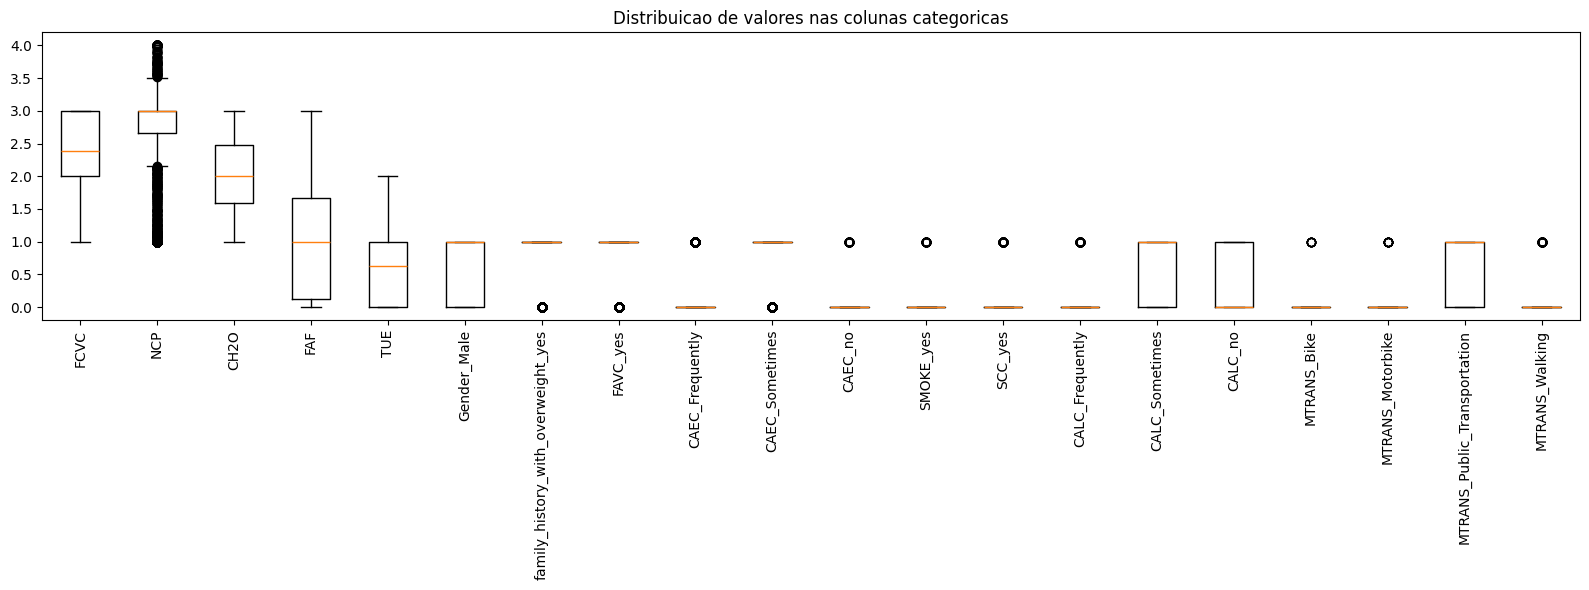

In [98]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 6))
plt.boxplot(aux.values, tick_labels=aux.columns, vert=True) 
plt.xticks(rotation=90)  
plt.title("Distribuicao de valores nas colunas categoricas")
plt.grid(False)
plt.tight_layout()
plt.show()

In [99]:
import seaborn as sns

'''
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PiYG')
plt.show()
'''

"\nplt.figure(figsize=(15,8))\nsns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PiYG')\nplt.show()\n"

In [100]:
df['NObeyesdad']

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64

## MLP

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(pd.get_dummies(X_train))  # Jeito mais rapido de fazer um processo similar ao One-Hot Encoder.
X_test = scaler.fit_transform(pd.get_dummies(X_test))

# Se nao fizer o processo tanto no treino quanto no teste, os valores vao estar completamente diferentes e o resultado vai ser mediocre.

In [103]:
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, solver='sgd' ,random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, random_state=42,
              solver='sgd')

In [104]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))  # Matriz de confusao.

[[56  0  0  0  0  0  0]
 [10 37  0  0  0 11  4]
 [ 0  0 61 16  1  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 43  9]
 [ 0  0  7  1  0  4 38]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.90      0.60      0.72        62
     Obesity_Type_I       0.90      0.78      0.84        78
    Obesity_Type_II       0.77      1.00      0.87        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.74      0.77      0.75        56
Overweight_Level_II       0.75      0.76      0.75        50

           accuracy                           0.84       423
          macro avg       0.84      0.84      0.83       423
       weighted avg       0.85      0.84      0.84       423



Como visto ao comparar os resultados com e sem a presença da coluna NCP, a qual possui o maior numero de outliers dentre as colunas categoricas, percebe-se que o desempenho do modelo MLP é melhor quando a coluna está ausente. Isso ocorre porque esse modelo é mais sensível à outliers.

In [105]:
X = df.drop(['NObeyesdad', 'NCP'], axis=1)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(pd.get_dummies(X_train))  # Jeito mais rapido de fazer um processo similar ao One-Hot Encoder.
X_test = scaler.fit_transform(pd.get_dummies(X_test))

# Se nao fizer o processo tanto no treino quanto no teste, os valores vao estar completamente diferentes e o resultado vai ser mediocre.

model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, solver='sgd' ,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))  # Matriz de confusao.

[[55  1  0  0  0  0  0]
 [14 39  0  0  0  6  3]
 [ 0  0 59 17  0  0  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 46  7]
 [ 0  0  3  1  0  4 42]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.98      0.88        56
      Normal_Weight       0.91      0.63      0.74        62
     Obesity_Type_I       0.94      0.76      0.84        78
    Obesity_Type_II       0.76      0.98      0.86        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.82      0.82      0.82        56
Overweight_Level_II       0.78      0.84      0.81        50

           accuracy                           0.85       423
          macro avg       0.86      0.86      0.85       423
       weighted avg       0.86      0.85      0.85       423



In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam'],  
    'learning_rate': ['adaptive']
}

param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}


grid = GridSearchCV(MLPClassifier(max_iter=1000000), param_grid, cv=3, n_jobs=3)  #n n_jobs especifica quantos nucleos do processador usar. To usando todos pra ser mais rapido.
grid.fit(X, y)

print("Melhores parâmetros:", grid.best_params_)


Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [107]:
model = MLPClassifier(activation='relu', hidden_layer_sizes=(20,), learning_rate= 'adaptive', solver= 'lbfgs', max_iter=5000, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive', max_iter=5000,
              random_state=42, solver='lbfgs')

In [108]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))  # Matriz de confusao.

[[56  0  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 66 11  1  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 47  7]
 [ 0  0  3  0  0  2 45]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      1.00      0.96        56
      Normal_Weight       0.96      0.85      0.91        62
     Obesity_Type_I       0.96      0.85      0.90        78
    Obesity_Type_II       0.84      1.00      0.91        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.89      0.84      0.86        56
Overweight_Level_II       0.87      0.90      0.88        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



Os parâmetros ótimos encontrados através de uma grid search mostraram um desempenho aproximadamente 8% superior em relação aos parâmetros escolhidos anteriormente, mesmo com um espaço de melhora de em torno de apenas 15%. Isso demonstra que a escolha adequada dos parâmetros, considerando o tipo e quantidade dos dados, além do output desejado, é extremamente importante para a obtenção de dados corretos.